In [16]:
import numpy as np

In [17]:
# 50% Sparsity: all_layer_ratios are mutiplied by 100 
"""
    The “outlier ratio” of A by identifying
elements whose magnitude is M times greater
than the averaged value in each layer, where Hyperparameter M is 5.0, which
is nothing to do wtih sparsity and probability distributions. I need to adjust M
based on the truthfulness capability.
    The hyperparameter λ is to constrain the layerwise 
sparsity to fall within a small range, specifically, Si ∈ [S − λ, S + λ].
"""
C4_all_layer_ratio = np.array([1.5955328941345215, 1.2783536544212928, 1.7941474914550781, 1.9627814109508808, 
                               1.6294350990882285, 1.6532421112060547, 1.6224297193380501, 1.6455815388606145, 
                               1.6483449018918552, 1.6431913926051214, 1.6608825096717246, 1.6485654390775242, 
                               1.566159725189209, 1.689451474409837, 1.5935888657203086, 1.5917658805847168, 
                               1.435615924688486, 1.4572175649496226, 1.4265638131361742, 1.3749310603508582, 
                               1.3025746895716739, 1.2175271144280067, 1.1567386297079234, 1.1393771721766544, 
                               1.08566926075862, 1.0661524075728197, 1.025440601202158, 1.0476781771733212,
                               0.9700926450582651, 0.9911821438716008, 0.952605100778433, 0.8558117426358737])
enrichedTruthQA_all_layer_ratio = np.array([1.5826184016007643, 1.2958682500399075, 1.818308004966149, 
                                            1.982947954764733, 1.6614487537970908, 1.6773095497718222, 
                                            1.6315886607536905, 1.640559618289654, 1.6433601195995624, 
                                            1.639841153071477, 1.6514562643491306, 1.6358173810518704, 
                                            1.5379048310793362, 1.6426930060753457, 1.5606059477879453, 
                                            1.5681243859804592, 1.4290855481074405, 1.4547884464263916, 
                                            1.4379744346325214, 1.3963983609126163, 1.3217508792877197, 
                                            1.2432327637305627, 1.179563540678758, 1.1717988894535947, 
                                            1.1215902291811428, 1.1044140045459454, 1.071824018771832, 
                                            1.0978886714348426, 1.0213874853574314, 1.0648511923276462, 
                                            1.038153813435481, 0.9543437224168043])
lamda = 0.08
sparsity_ratio = 0.5
all_layer_ratio = np.array(C4_all_layer_ratio)
print(np.mean(all_layer_ratio) / 100) 
all_layer_ratio = (all_layer_ratio - all_layer_ratio.min()) / (all_layer_ratio.max() - all_layer_ratio.min()) * lamda * 2 # The values are normalized between [0, 2 * lamda].
owl_layer_maintain_ratio = all_layer_ratio - np.mean(all_layer_ratio) + (1 - sparsity_ratio) # Adjusts the values such that their mean is shifted by (1 - sparsity_ratio), which is crucial in controlling sparsity.
print(owl_layer_maintain_ratio)
print(np.mean(owl_layer_maintain_ratio)) # make sure average is sparsity rather than letting sum eaqual to one, each value is [0, 1].
"""
    Weight outliers are identified as weights whose outlier scores are 
at least M times larger than the mean. Could the hyperparameter M be dynamically
adjusted by the truth ratio? Use figure to visualize the difference why we need to adjust M.
s. Or 

Option 1: the pruning ratio be arranged by truthfulness ratio.
Option 2: Middle layer, more truth capability, we need to make M lower to save more parameters.
Option 3: record the mean and std instead of just all layer ratio.
"""

0.013977697548957972
[0.52858443 0.48273975 0.55729194 0.58166607 0.53348462 0.53692565
 0.53247207 0.5358184  0.53621782 0.53547293 0.53802999 0.53624969
 0.52433887 0.54215931 0.52830345 0.52803996 0.50547024 0.50859251
 0.50416186 0.49669892 0.48624063 0.47394796 0.46516167 0.46265226
 0.45488939 0.45206845 0.44618401 0.4493982  0.43818409 0.44123234
 0.43565646 0.42166607]
0.49999999999999994


'\n    Weight outliers are identified as weights whose outlier scores are \nat least M times larger than the mean. Could the hyperparameter M be dynamically\nadjusted by the truth ratio? Use figure to visualize the difference why we need to adjust M.\ns. Or \n\nOption 1: the pruning ratio be arranged by truthfulness ratio.\nOption 2: Middle layer, more truth capability, we need to make M lower to save more parameters.\nOption 3: record the mean and std instead of just all layer ratio.\n'

In [18]:
cities_var_ratio = np.array([3.39071090e-04, 1.04245816e-03, 2.39174780e-03, 6.37486248e-03,
                             3.81021744e-02, 8.09538393e-02, 1.32550373e-01, 2.47270862e-01,
                             3.81992400e-01, 5.26349089e-01, 6.45404196e-01, 7.53192202e-01,
                             7.32511960e-01, 6.94884655e-01, 6.29495111e-01, 6.29789162e-01,
                             5.79958105e-01, 5.05475324e-01, 4.78962535e-01, 4.64287028e-01,
                             4.53694642e-01, 4.26050788e-01, 4.09579671e-01, 3.94378530e-01,
                             3.39963516e-01, 3.15667607e-01, 2.97716687e-01, 2.58198872e-01,
                             2.57569347e-01, 2.37331753e-01, 1.95439694e-01, 1.61557409e-01])
neg_cities_var_ratio = np.array([2.75635858e-04, 1.04091549e-03, 2.34982485e-03, 6.99114158e-03,
                                 4.09611215e-02, 8.77295960e-02, 1.22624907e-01, 1.88092399e-01,
                                 3.41688715e-01, 5.12884356e-01, 6.27721497e-01, 6.55794854e-01,
                                 1.01014698e+00, 8.92597053e-01, 7.48149017e-01, 6.31548774e-01,
                                 5.36927071e-01, 4.01787252e-01, 3.04532688e-01, 2.92508502e-01,
                                 2.59050552e-01, 2.27964383e-01, 2.02185914e-01, 1.68580469e-01,
                                 9.77188368e-02, 9.09651150e-02, 7.93741087e-02, 6.23002706e-02,
                                 6.09152265e-02, 5.66922517e-02, 4.91064340e-02, 3.92692501e-02])
sp_en_trans_var_ratio = np.array([0.00650565, 0.00233356, 0.00296728, 0.0100899,  0.01508244, 0.03669597,
                                  0.07735114, 0.12632234, 0.19591362, 0.24608271, 0.31299248, 0.3722659,
                                  0.38678397, 0.32486482, 0.27961429, 0.23536007, 0.21875916, 0.19583675,
                                  0.18217044, 0.17587753, 0.16802919, 0.14759805, 0.13368673, 0.12258105,
                                  0.11283833, 0.10460265, 0.0997852,  0.09395919, 0.08996084, 0.08321178,
                                  0.08815841, 0.11194301])
neg_sp_en_trans_var_ratio = np.array( [0.00566225, 0.00234005, 0.00331782, 0.0127961,  0.01657107, 0.03848792,
                                       0.09450669, 0.16633245, 0.26102221, 0.30004234, 0.3645685,  0.45129881,
                                       0.5066566,  0.47487872, 0.43538618, 0.38333991, 0.38493038, 0.38590715,
                                       0.35965402, 0.34839013, 0.34806121, 0.30753975, 0.26950751, 0.25464624,
                                       0.21906972, 0.19438002, 0.17653393, 0.15905798, 0.15261992, 0.14192056,
                                       0.12835094, 0.11994015])
cities_var_ratio_pd = cities_var_ratio / np.sum(cities_var_ratio)
neg_cities_var_ratio_pd = neg_cities_var_ratio / np.sum(neg_cities_var_ratio)
sp_en_trans_var_ratio_pd = sp_en_trans_var_ratio / np.sum(sp_en_trans_var_ratio)
neg_sp_en_trans_var_pd = neg_sp_en_trans_var_ratio / np.sum(neg_sp_en_trans_var_ratio)
var_ratio_pd = (cities_var_ratio_pd + neg_cities_var_ratio_pd + sp_en_trans_var_ratio_pd + neg_sp_en_trans_var_pd) / 4.0 # truthfulness ratio
print(var_ratio_pd)
print(sum(var_ratio_pd))
print("\n")


[0.00054657 0.00025357 0.00038668 0.00129819 0.00335505 0.00750231
 0.01364781 0.02302693 0.03720128 0.04920546 0.06078086 0.06998406
 0.08220764 0.07371854 0.06446709 0.05709474 0.0524836  0.04582246
 0.04087539 0.03950093 0.03789248 0.03396708 0.03086585 0.02849348
 0.02357162 0.02158214 0.02000452 0.01775252 0.0172737  0.01599251
 0.01465394 0.01459101]
0.9999999999999996




In [19]:
# Option 1: the pruning ratio be arranged by truthfulness ratio.
sparsity = 0.5
layer_num = 32
all_layer_ratio = np.full(layer_num, 1 - sparsity)
# The scaling factor (e.g., 0.1) determines how much deviation from sparsity is allowed
scaling_factor = 0.08
adjustments = (var_ratio_pd - 1/32) * scaling_factor * 32  # Center around 0
option1_layer_maintain_ratio = all_layer_ratio + adjustments
option1_sparsity_array = np.full(layer_num, 1) - option1_layer_maintain_ratio
print(option1_sparsity_array)
print(np.mean(option1_sparsity_array))


option2_sparsity_array = np.array([0.516151, 0.518339, 0.515663, 0.515897, 0.517634, 0.516639, 
                                   0.515897, 0.513221, 0.506601, 0.495624, 0.475370, 0.442674, 0.360370, 
                                   0.426307, 0.465370, 0.484394, 0.492713, 0.501230, 0.505859, 0.507343, 
                                   0.509080, 0.512245, 0.514395, 0.515409, 0.517362, 0.518085, 0.518573, 
                                   0.518846,  0.519531, 0.519550, 0.519804, 0.520311])
option2_layer_maintain_ratio = np.full(layer_num, 1) - option2_sparsity_array







[0.57860078 0.57935086 0.5790101  0.57667662 0.57141108 0.56079408
 0.5450616  0.52105107 0.48476473 0.45403403 0.42440099 0.40084081
 0.36954844 0.39128054 0.41496425 0.43383747 0.44564199 0.46269451
 0.47535901 0.47887762 0.48299524 0.49304428 0.50098343 0.50705669
 0.51965665 0.52474971 0.52878842 0.53455356 0.53577933 0.53905918
 0.54248591 0.542647  ]
0.49999999999999994


[0.52858443 0.48273975 0.55729194 0.58166607 0.53348462 0.53692565
 0.53247207 0.5358184  0.53621782 0.53547293 0.53802999 0.53624969
 0.52433887 0.54215931 0.52830345 0.52803996 0.50547024 0.50859251
 0.50416186 0.49669892 0.48624063 0.47394796 0.46516167 0.46265226
 0.45488939 0.45206845 0.44618401 0.4493982  0.43818409 0.44123234
 0.43565646 0.42166607]
[0.42139922 0.42064914 0.4209899  0.42332338 0.42858892 0.43920592
 0.4549384  0.47894893 0.51523527 0.54596597 0.57559901 0.59915919
 0.63045156 0.60871946 0.58503575 0.56616253 0.55435801 0.53730549
 0.52464099 0.52112238 0.51700476 0.50695572 0.49901657 0.49294331
 0.48034335 0.47525029 0.47121158 0.46544644 0.46422067 0.46094082
 0.45751409 0.457353  ]
0.5253571449209574
0.5


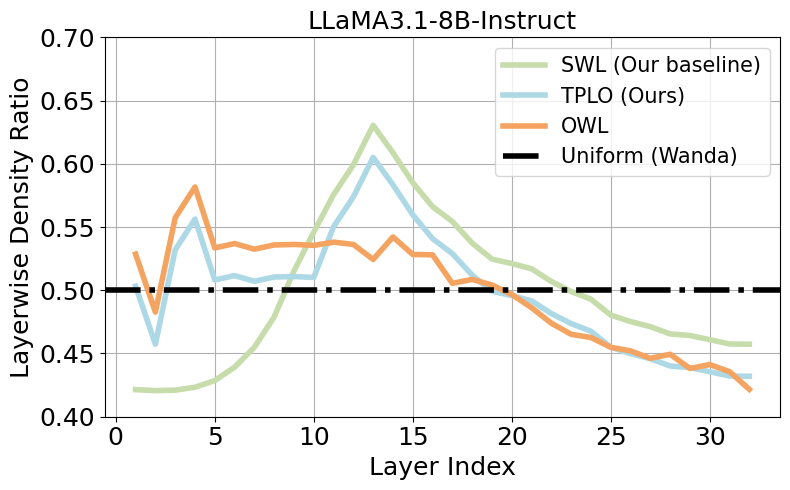

In [20]:
import copy
import matplotlib.pyplot as plt

print(owl_layer_maintain_ratio)
print(option1_layer_maintain_ratio)


# Dummy data for LLaMA-7B
layers_7b = np.arange(1, 33)

uniform_line = 0.5

# Colors matching the original plot
option1_color = '#c6dcab'   # light green for option1
option2_color = '#add8e6' # light blue for option2
owl_color = '#f4a460'   # light orange for OWL line

# Common y-axis limits and ticks
y_min, y_max = 0.0, 1.0
y_ticks = np.arange(y_min, y_max + 0.2, 0.2)

# Create the figure
fig, ax = plt.subplots(figsize=(8, 5))

option2_layer_maintain_ratio = copy.deepcopy(option1_layer_maintain_ratio)
option2_layer_maintain_ratio[0:10] = owl_layer_maintain_ratio[0:10]

print(np.mean(option2_layer_maintain_ratio))
option2_layer_maintain_ratio = option2_layer_maintain_ratio - (np.mean(option2_layer_maintain_ratio) - 0.5) 
# option2_layer_maintain_ratio[10:] = option2_layer_maintain_ratio[10:] - (np.mean(option2_layer_maintain_ratio) - 0.5) * option2_layer_maintain_ratio.shape[0] / (option2_layer_maintain_ratio.shape[0] - 10)  
print(np.mean(option2_layer_maintain_ratio))
# Plotting
ax.plot(layers_7b, option1_layer_maintain_ratio, color=option1_color, label='SWL (Our baseline)', linewidth=4)
ax.plot(layers_7b, option2_layer_maintain_ratio, color=option2_color, label='TPLO (Ours)', linewidth=4)
ax.plot(layers_7b, owl_layer_maintain_ratio, color=owl_color, label='OWL', linewidth=4)
ax.axhline(uniform_line, color='black', linestyle='-.', linewidth=4, label='Uniform (Wanda)')

# Title and labels
ax.set_title('LLaMA3.1-8B-Instruct', fontsize=18)
ax.set_xlabel('Layer Index', fontsize=18)
ax.set_ylabel('Layerwise Density Ratio', fontsize=18)
ax.tick_params(axis='both', labelsize=18)

# Set y-axis limits and ticks
ax.set_ylim(0.4, 0.7)


# Add legend and grid
ax.legend(fontsize=15)
ax.grid(True)

# Display the plot
plt.tight_layout()
plt.show()



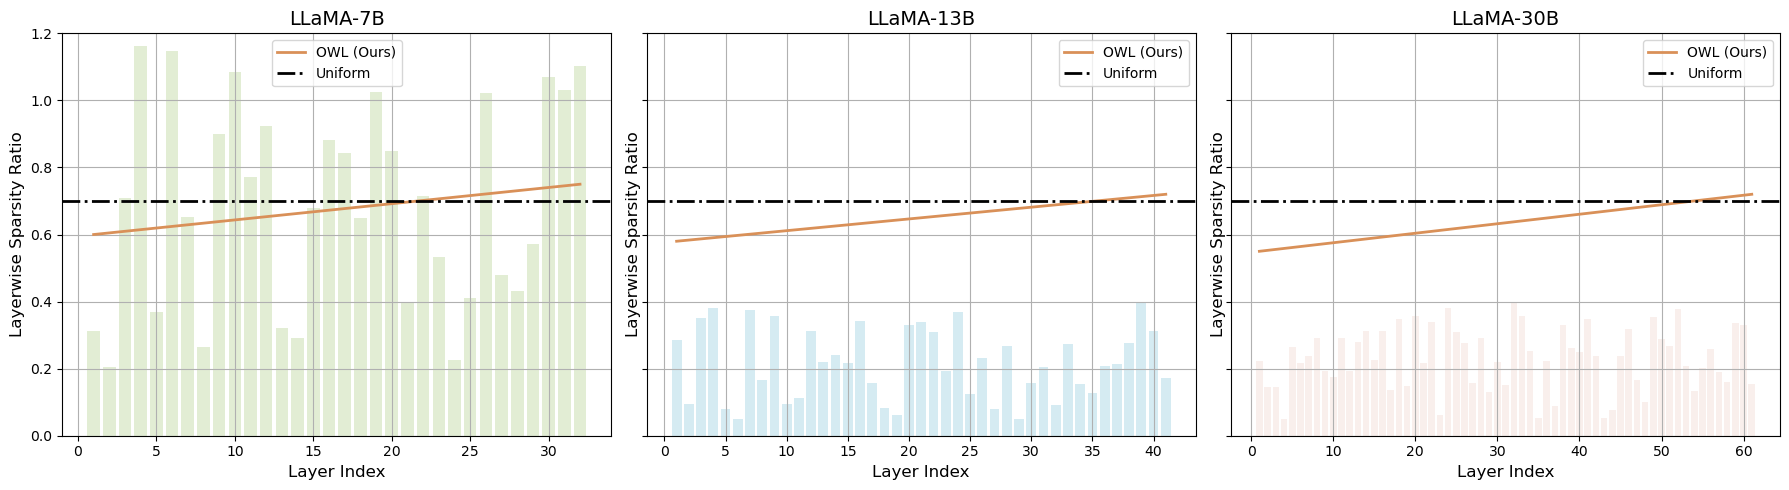

In [21]:
# Dummy data for LLaMA models
layers_7b = np.arange(1, 33)
sparsity_7b = np.random.uniform(0.2, 1.2, size=32)
owl_7b = np.linspace(0.6, 0.75, 32)

layers_13b = np.arange(1, 42)
sparsity_13b = np.random.uniform(0.05, 0.4, size=41)
owl_13b = np.linspace(0.58, 0.72, 41)

layers_30b = np.arange(1, 62)
sparsity_30b = np.random.uniform(0.05, 0.4, size=61)
owl_30b = np.linspace(0.55, 0.72, 61)

uniform_line = 0.7

# Create the figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Colors matching the original plot
colors = ['#c6dcab', '#add8e6', '#f5e1da']
owl_colors = ['#d99058', '#d99058', '#d99058']

# Common y-axis limits and ticks
y_min, y_max = 0.0, 1.2
y_ticks = np.arange(y_min, y_max + 0.2, 0.2)

# Plotting function for each subplot
def plot_data(ax, layers, sparsity, owl, title, color, owl_color):
    ax.bar(layers, sparsity, color=color, alpha=0.5)
    ax.plot(layers, owl, color=owl_color, label='OWL (Ours)', linewidth=2)
    ax.axhline(uniform_line, color='black', linestyle='-.', linewidth=2, label='Uniform')
    
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Layer Index', fontsize=12)
    ax.set_ylabel('Layerwise Sparsity Ratio', fontsize=12)
    
    ax.set_ylim(y_min, y_max)
    ax.set_yticks(y_ticks)
    
    ax.legend()
    ax.grid(True)

# Plotting each model
plot_data(axes[0], layers_7b, sparsity_7b, owl_7b, 'LLaMA-7B', colors[0], owl_colors[0])
plot_data(axes[1], layers_13b, sparsity_13b, owl_13b, 'LLaMA-13B', colors[1], owl_colors[1])
plot_data(axes[2], layers_30b, sparsity_30b, owl_30b, 'LLaMA-30B', colors[2], owl_colors[2])

plt.tight_layout()
plt.show()

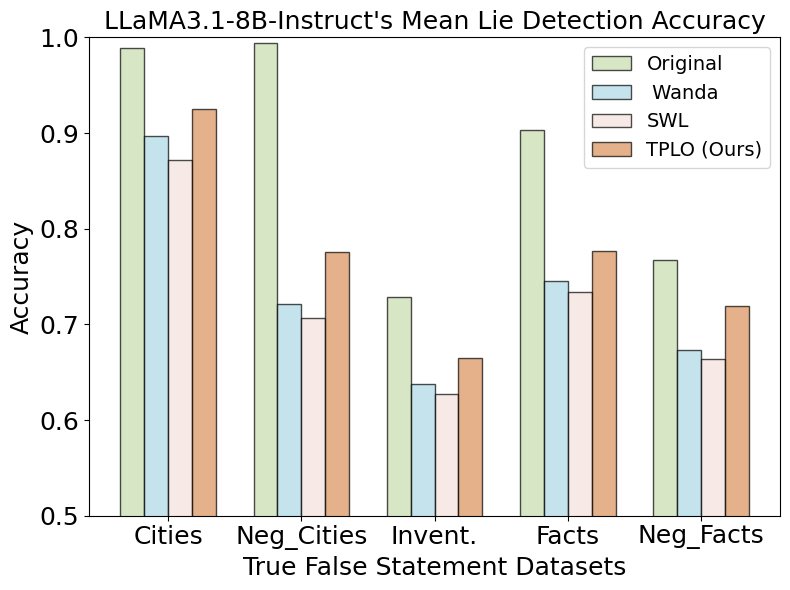

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ["Cities", "Neg_Cities", "Invent.", "Facts", "Neg_Facts"]
original_acc = [0.9892, 0.9942, 0.7285, 0.9032, 0.7669]
wanda_acc = [0.8968, 0.7215, 0.6377, 0.7453, 0.6729]
option1_acc = [0.8717, 0.7071, 0.6272, 0.7338, 0.6641]
option2_acc = [0.9254, 0.7753, 0.6650, 0.7770, 0.7195]

# Bar width and positions
x = np.arange(len(categories))
width = 0.18  # Slightly larger width to keep bars close but distinct

# Create bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - 1.5 * width, original_acc, width, label='Original', color='#c6dcab', alpha=0.7, edgecolor='black')
bars2 = ax.bar(x - 0.5 * width, wanda_acc, width, label=' Wanda', color='#add8e6', alpha=0.7, edgecolor='black')
bars3 = ax.bar(x + 0.5 * width, option1_acc, width, label='SWL', color='#f5e1da', alpha=0.7, edgecolor='black')
bars4 = ax.bar(x + 1.5 * width, option2_acc, width, label='TPLO (Ours)', color='#d99058', alpha=0.7, edgecolor='black')

# Labels and title
ax.set_xlabel("True False Statement Datasets", fontsize=18)
ax.set_ylabel("Accuracy", fontsize=18)
ax.set_title("LLaMA3.1-8B-Instruct's Mean Lie Detection Accuracy", fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=18)
ax.set_ylim(0.5, 1.0)
ax.tick_params(axis='both', labelsize=18)
ax.legend(fontsize=14)

# Display the chart
plt.tight_layout()
plt.show()

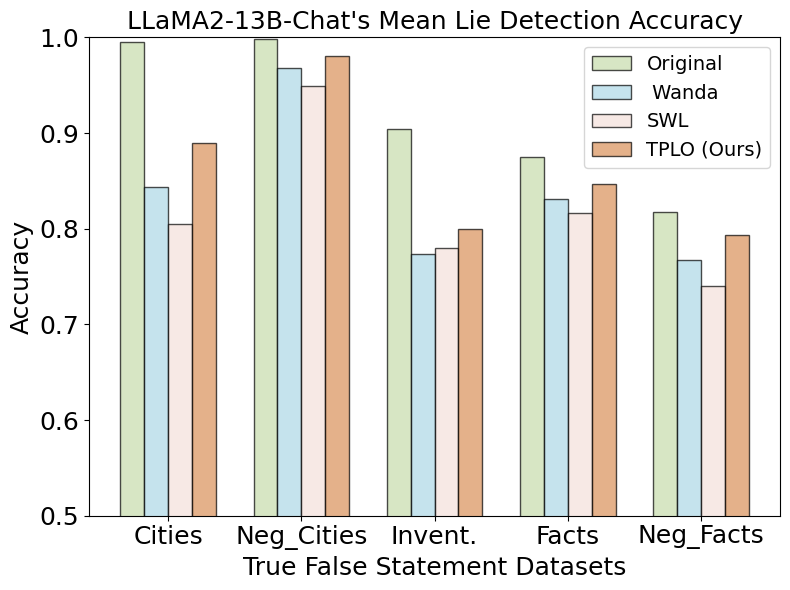

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ["Cities", "Neg_Cities", "Invent.", "Facts", "Neg_Facts"]
original_acc = [0.9951, 0.9986, 0.9046, 0.8746, 0.8172]
wanda_acc = [0.8439, 0.9680, 0.7737, 0.8313, 0.7671]
option1_acc = [0.8046, 0.9492, 0.7800, 0.8169, 0.7402]
option2_acc = [0.8897, 0.9802, 0.8001, 0.8469, 0.7936]

# Bar width and positions
x = np.arange(len(categories))
width = 0.18  # Slightly larger width to keep bars close but distinct

# Create bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - 1.5 * width, original_acc, width, label='Original', color='#c6dcab', alpha=0.7, edgecolor='black')
bars2 = ax.bar(x - 0.5 * width, wanda_acc, width, label=' Wanda', color='#add8e6', alpha=0.7, edgecolor='black')
bars3 = ax.bar(x + 0.5 * width, option1_acc, width, label='SWL', color='#f5e1da', alpha=0.7, edgecolor='black')
bars4 = ax.bar(x + 1.5 * width, option2_acc, width, label='TPLO (Ours)', color='#d99058', alpha=0.7, edgecolor='black')

# Labels and title
ax.set_xlabel("True False Statement Datasets", fontsize=18)
ax.set_ylabel("Accuracy", fontsize=18)
ax.set_title("LLaMA2-13B-Chat's Mean Lie Detection Accuracy", fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=18)
ax.set_ylim(0.5, 1.0)
ax.tick_params(axis='both', labelsize=18)
ax.legend(fontsize=14)

# Display the chart
plt.tight_layout()
# plt.savefig("LLaMA2-13B-Chat_bar_comparison_original_wanda0.5.png")
plt.show()

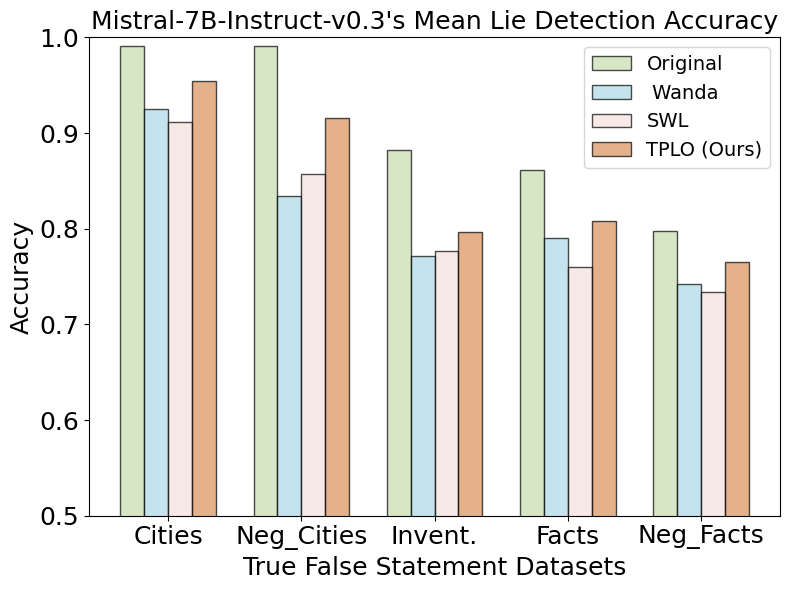

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ["Cities", "Neg_Cities", "Invent.", "Facts", "Neg_Facts"]
original_acc = [0.9911, 0.9909, 0.8826, 0.8609, 0.7977]
wanda_acc = [0.9251, 0.8344, 0.7710, 0.7901, 0.7423]
option1_acc = [0.9117, 0.8571, 0.7772, 0.7601, 0.7341]
option2_acc = [0.9545, 0.9160, 0.7968, 0.8081, 0.7653]

# Bar width and positions
x = np.arange(len(categories))
width = 0.18  # Slightly larger width to keep bars close but distinct

# Create bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - 1.5 * width, original_acc, width, label='Original', color='#c6dcab', alpha=0.7, edgecolor='black')
bars2 = ax.bar(x - 0.5 * width, wanda_acc, width, label=' Wanda', color='#add8e6', alpha=0.7, edgecolor='black')
bars3 = ax.bar(x + 0.5 * width, option1_acc, width, label='SWL', color='#f5e1da', alpha=0.7, edgecolor='black')
bars4 = ax.bar(x + 1.5 * width, option2_acc, width, label='TPLO (Ours)', color='#d99058', alpha=0.7, edgecolor='black')

# Labels and title
ax.set_xlabel("True False Statement Datasets", fontsize=18)
ax.set_ylabel("Accuracy", fontsize=18)
ax.set_title("Mistral-7B-Instruct-v0.3's Mean Lie Detection Accuracy", fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=18)
ax.set_ylim(0.5, 1.0)
ax.tick_params(axis='both', labelsize=18)
ax.legend(fontsize=14)

# Display the chart
plt.tight_layout()
# plt.savefig("Mistral-7B-Instruct-v0.3_bar_comparison_original_wanda0.5.png")
plt.show()

In [48]:
# Option 2: Middle layer, more truth capability, we need to make M lower to save more parameters.
hyper_m = 5
layer_num = 32
all_layer_hyper_m = np.full(layer_num, hyper_m)

# The scaling factor (e.g., 0.1) determines how much deviation from sparsity is allowed
scaling_factor = 1.0
adjustments = (var_ratio_pd - 1/32) * scaling_factor * 32  # Center around 0
all_layer_hyper_m = all_layer_hyper_m - adjustments
print(all_layer_hyper_m)
print(np.mean(all_layer_hyper_m))





[5.98250973 5.99188572 5.98762631 5.95845778 5.89263849 5.75992605
 5.56327006 5.26313832 4.80955908 4.42542539 4.05501243 3.76051009
 3.36935547 3.64100674 3.93705308 4.17296836 4.32052493 4.53368134
 4.69198764 4.73597028 4.78744053 4.91305355 5.01229284 5.08820868
 5.24570818 5.30937142 5.35985529 5.43191948 5.44724163 5.48823974
 5.53107382 5.53308753]
5.0


0.007161020877932713
[0.56399515 0.57158793 0.5724377  0.55336679 0.59614975 0.56739535
 0.56477387 0.54425891 0.54602579 0.55140313 0.54780197 0.53943911
 0.54033469 0.54501099 0.53293075 0.51568844 0.51333514 0.50128154
 0.49359977 0.48780771 0.47626274 0.47435345 0.47123751 0.4672794
 0.46274359 0.46551625 0.46071135 0.46729944 0.46362587 0.46387187
 0.4664076  0.4571722  0.45989323 0.44984769 0.45025718 0.44293403
 0.4377409  0.43614975 0.43716086 0.44091058]
0.5
var_ratio_pd:  [7.96537913e-05 8.71610071e-05 1.32083763e-04 1.72948965e-04
 8.30656301e-04 3.04551563e-03 3.49862725e-03 8.63040974e-03
 1.39558340e-02 2.49667743e-02 2.83593940e-02 3.83760335e-02
 4.41043010e-02 5.05169707e-02 5.12418186e-02 4.99751854e-02
 4.64220280e-02 4.37501740e-02 4.25395344e-02 4.05713067e-02
 3.89435566e-02 3.47238109e-02 3.41730724e-02 3.18827422e-02
 3.04479562e-02 2.96651937e-02 2.72324697e-02 2.63675620e-02
 2.44443547e-02 2.38463067e-02 2.31027600e-02 2.26387430e-02
 2.19998607e-02 2.1653080

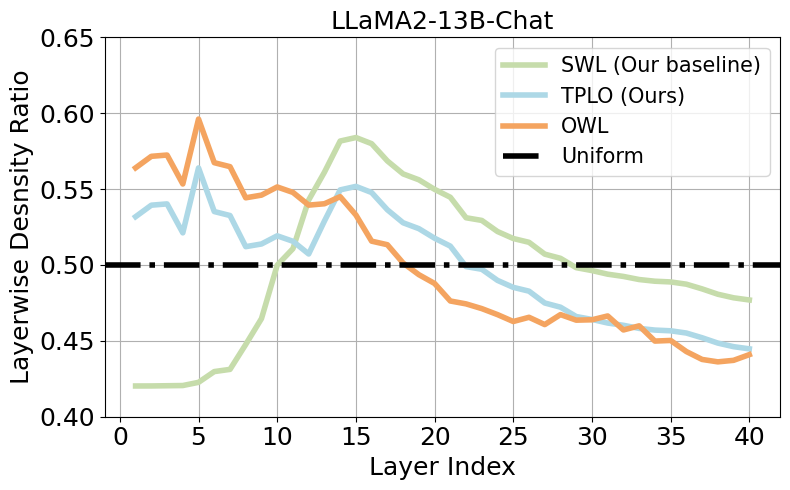

In [7]:
# LLaMA2-13B-Chat layer 14
import copy
import numpy as np
import matplotlib.pyplot as plt
C4_all_layer_ratio = np.array([1.1591332806043388, 1.2116972868107567, 1.2175801174699767, 
                                1.0855543908994059, 1.3817359987369253, 1.1826724848471397, 
                                1.1645242990541065, 1.0225015435337035, 1.034733480658413, 
                                1.0719601970073604, 1.0470297316874355, 0.9891346072362475, 
                                0.9953345937177169, 1.0277081324049264, 0.944077988301427, 
                                0.8247113818964683, 0.808419787194118, 0.7249740726691632, 
                                0.6717940401439825, 0.6316962123902375, 0.5517716841264205, 
                                0.5385539157331483, 0.5169825908566309, 0.48958108444844395, 
                                0.4581801359318505, 0.47737499899115443, 0.44411115409914126, 
                                0.48971980071264853, 0.46428806525616606, 0.4659911226635137, 
                                0.48354566589859893, 0.4196100786697766, 0.43844743208451703, 
                                0.3689032940825155, 0.3717381501000775, 0.32104082343992124, 
                                0.285089350928945, 0.27407401849415675, 0.28107383034446026, 0.3070326876049199])
lamda = 0.08
sparsity_ratio = 0.5
all_layer_ratio = np.array(C4_all_layer_ratio)
print(np.mean(all_layer_ratio) / 100) 
all_layer_ratio = (all_layer_ratio - all_layer_ratio.min()) / (all_layer_ratio.max() - all_layer_ratio.min()) * lamda * 2 # The values are normalized between [0, 2 * lamda].
owl_layer_maintain_ratio = all_layer_ratio - np.mean(all_layer_ratio) + (1 - sparsity_ratio) # Adjusts the values such that their mean is shifted by (1 - sparsity_ratio), which is crucial in controlling sparsity.
print(owl_layer_maintain_ratio)
print(np.mean(owl_layer_maintain_ratio)) # make sure average is sparsity rather than letting sum eaqual to one, each value is [0, 1].
cities_var_ratio = np.array([1.34069618e-04, 1.01290691e-04, 1.01395135e-04, 9.11259914e-04,
                             1.29223651e-02, 3.33032686e-02, 3.47080900e-02, 9.35025613e-02,
                             1.53762834e-01, 3.95125587e-01, 4.83480971e-01, 6.14879019e-01,
                             7.18658946e-01, 7.63396798e-01, 7.58919909e-01, 6.96811567e-01,
                             5.97693556e-01, 5.67152247e-01, 5.41872485e-01, 5.07069382e-01,
                             4.79610024e-01, 4.26690772e-01, 4.09675636e-01, 3.78543970e-01,
                             3.60294434e-01, 3.54320887e-01, 3.27635582e-01, 3.26762833e-01,
                             3.05676849e-01, 2.96628321e-01, 2.86488970e-01, 2.80215814e-01,
                             2.72507135e-01, 2.65403988e-01, 2.66172511e-01, 2.59197293e-01,
                             2.47589890e-01, 2.37944439e-01, 2.24037604e-01, 1.95875832e-01])
neg_cities_var_ratio = np.array([2.43484155e-04, 1.58490869e-04, 1.61418970e-04, 9.44208714e-04,
                                 1.36771279e-02, 3.52960413e-02, 3.62310257e-02, 9.41538934e-02,
                                 1.80279431e-01, 3.05234380e-01, 3.07087058e-01, 4.25119273e-01,
                                 4.38110662e-01, 5.13082457e-01, 5.14731941e-01, 5.36897282e-01,
                                 5.13918546e-01, 4.64267745e-01, 4.57722780e-01, 4.26827796e-01,
                                 4.04295825e-01, 3.34723812e-01, 3.14398389e-01, 2.73027010e-01,
                                 2.53230728e-01, 2.43712560e-01, 2.13677067e-01, 1.99056167e-01,
                                 1.77085069e-01, 1.68766710e-01, 1.61668030e-01, 1.55755802e-01, 
                                 1.45841118e-01, 1.45062522e-01, 1.48570915e-01, 1.46010050e-01,
                                 1.38354139e-01, 1.30462898e-01, 1.26544759e-01, 1.16083349e-01])
sp_en_trans_var_ratio = np.array([0.00152078, 0.00178027, 0.00268346, 0.00278452, 0.00456635, 0.0293738,
                                  0.03840297, 0.09246504, 0.1213476,  0.19529955, 0.22897366, 0.29735841,
                                  0.36551053, 0.44216985, 0.44482454, 0.42751286, 0.41531314, 0.4049494,
                                  0.39049526, 0.37933314, 0.365285,   0.342401,   0.35386232, 0.34439429,
                                  0.33166123, 0.322755,  0.29908096, 0.28927534, 0.27582071, 0.27263517,
                                  0.26554488, 0.26216983, 0.26108605, 0.25580946, 0.25350143, 0.24853751,
                                  0.23717513, 0.22427546, 0.221084, 0.26509958])
neg_sp_en_trans_var_ratio = np.array([0.0015318,  0.00171704, 0.0027661,  0.00285272, 0.00480887, 0.03423065,
                                      0.04249519, 0.09435088, 0.14787492, 0.2047889,  0.24363107, 0.36754176,
                                      0.44787096, 0.52434068, 0.55734157, 0.54540121, 0.51014682, 0.4868963,
                                      0.47782186, 0.46865264, 0.46173493, 0.42564806, 0.42723793, 0.41091905,
                                      0.39981747, 0.39087626, 0.36620457, 0.35638307, 0.32838264, 0.32262172,
                                      0.31403203, 0.30927054, 0.29992871, 0.29715262, 0.28777251, 0.28127836,
                                      0.26905906, 0.25110724, 0.23763362, 0.20298873])
cities_var_ratio_pd = cities_var_ratio / np.sum(cities_var_ratio)
neg_cities_var_ratio_pd = neg_cities_var_ratio / np.sum(neg_cities_var_ratio)
sp_en_trans_var_ratio_pd = sp_en_trans_var_ratio / np.sum(sp_en_trans_var_ratio)
neg_sp_en_trans_var_pd = neg_sp_en_trans_var_ratio / np.sum(neg_sp_en_trans_var_ratio)
var_ratio_pd = (cities_var_ratio_pd + neg_cities_var_ratio_pd + sp_en_trans_var_ratio_pd + neg_sp_en_trans_var_pd) / 4.0 # truthfulness ratio
print("var_ratio_pd: ", var_ratio_pd)
print("sum(var_ratio_pd): ", sum(var_ratio_pd))
print("\n")

# Option 1: the pruning ratio be arranged by truthfulness ratio.
sparsity = 0.5
layer_num = 40
all_layer_ratio = np.full(layer_num, 1 - sparsity)
# The scaling factor (e.g., 0.1) determines how much deviation from sparsity is allowed
scaling_factor = 0.08
adjustments = (var_ratio_pd - 1/layer_num ) * scaling_factor * layer_num   # Center around 0
option1_layer_maintain_ratio = all_layer_ratio + adjustments
option1_sparsity_array = np.full(layer_num, 1) - option1_layer_maintain_ratio
print("option1_sparsity_array: ", option1_sparsity_array)
print("np.mean(option1_sparsity_array): ", np.mean(option1_sparsity_array))


print("owl_layer_maintain_ratio: ", owl_layer_maintain_ratio)
print("option1_layer_maintain_ratio: ", option1_layer_maintain_ratio)


# Dummy data for LLaMA-7B
layers_7b = np.arange(1, layer_num + 1 )

uniform_line = 0.5

# Colors matching the original plot
option1_color = '#c6dcab'   # light green for option1
option2_color = '#add8e6' # light blue for option2
owl_color = '#f4a460'   # light orange for OWL line

# Common y-axis limits and ticks
y_min, y_max = 0.0, 1.0
y_ticks = np.arange(y_min, y_max + 0.2, 0.2)

# Create the figure
fig, ax = plt.subplots(figsize=(8, 5))

option2_layer_maintain_ratio = copy.deepcopy(option1_layer_maintain_ratio)
option2_layer_maintain_ratio[0:12] = owl_layer_maintain_ratio[0:12]

print("np.mean(option2_layer_maintain_ratio): ", np.mean(option2_layer_maintain_ratio))
option2_layer_maintain_ratio = option2_layer_maintain_ratio - (np.mean(option2_layer_maintain_ratio) - 0.5) 
# option2_layer_maintain_ratio[12:] = option2_layer_maintain_ratio[12:] - (np.mean(option2_layer_maintain_ratio) - 0.5) * option2_layer_maintain_ratio.shape[0] / (option2_layer_maintain_ratio.shape[0] - 10)  
print("np.mean(option2_layer_maintain_ratio): ", np.mean(option2_layer_maintain_ratio))
# Plotting
ax.plot(layers_7b, option1_layer_maintain_ratio, color=option1_color, label='SWL (Our baseline)', linewidth=4)
ax.plot(layers_7b, option2_layer_maintain_ratio, color=option2_color, label='TPLO (Ours)', linewidth=4)
ax.plot(layers_7b, owl_layer_maintain_ratio, color=owl_color, label='OWL', linewidth=4)
ax.axhline(uniform_line, color='black', linestyle='-.', linewidth=4, label='Uniform')

# Title and labels
ax.set_title('LLaMA2-13B-Chat', fontsize=18)
ax.set_xlabel('Layer Index', fontsize=18)
ax.set_ylabel('Layerwise Desnsity Ratio', fontsize=18)
ax.tick_params(axis='both', labelsize=18)

# Set y-axis limits and ticks
ax.set_ylim(0.4, 0.65)

# Add legend and grid
ax.legend(fontsize=15)
ax.grid(True)

# Display the plot
plt.tight_layout()
# plt.savefig("LLaMA2-13B-Chat_swl_vs_owl_vs_tplo.png")
plt.show()



0.012308581087451713
[0.60019458 0.52419355 0.59263402 0.49734429 0.52794916 0.53831268
 0.51736787 0.50315066 0.50944918 0.53418241 0.53190591 0.5444185
 0.53971659 0.5179476  0.52145748 0.51876762 0.50412826 0.48971442
 0.5070248  0.48146646 0.46573674 0.45794189 0.45450733 0.4462588
 0.44358697 0.44019458 0.44496915 0.44512327 0.46967801 0.47143255
 0.479868   0.47937666]
0.49999999999999994
[0.00023129 0.00022696 0.00029547 0.00055794 0.00240885 0.00368781
 0.00858235 0.01164639 0.01699999 0.02227643 0.03108513 0.05351708
 0.05986904 0.07039162 0.06670241 0.06398866 0.06157132 0.05861651
 0.05316526 0.04693646 0.04191751 0.03664481 0.03476144 0.03397152
 0.03168956 0.03142613 0.03034837 0.02924747 0.02701274 0.02473669
 0.02381236 0.02167443]
0.9999999999999998


[0.57940789 0.57941899 0.5792436  0.57857167 0.57383335 0.57055919
 0.55802917 0.55018524 0.53648004 0.52297234 0.50042207 0.44299627
 0.42673527 0.39979744 0.40924184 0.41618904 0.42237741 0.42994174
 0.44389693 0.4598426

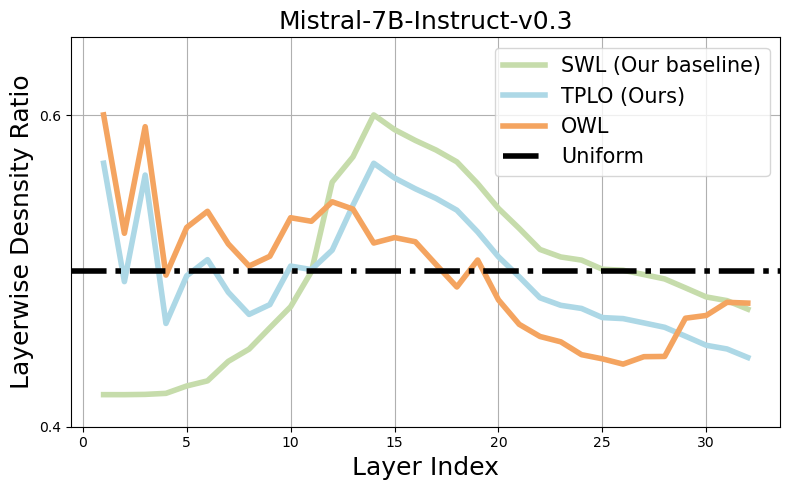

In [8]:
# Mistral-7B-Instruct-v0.3 layer 13
import copy
import numpy as np
import matplotlib.pyplot as plt
C4_all_layer_ratio = np.array([1.62849838917072, 1.3268745862520657, 1.5984929524935207, 1.2203184457925649, 
                               1.3417794154240537, 1.3829089128054104, 1.2997856506934533, 1.2433620599599986, 
                               1.2683588724869947, 1.3665171769949107, 1.3574824883387637, 1.4071409518902118, 
                               1.3884805716001072, 1.3020863899817834, 1.3160159954657922, 1.3053408035865197, 
                               1.2472418638376088, 1.1900379107548642, 1.2587373073284442, 1.157304415336022, 
                               1.0948781783764179, 1.0639429092407227, 1.0503122439751258, 1.0175764560699463, 
                               1.0069727897644043, 0.9935094760014461, 1.0124582510728102, 1.0130698864276593,
                               1.1105198126572828, 1.1174830106588511, 1.1509606471428504, 1.1490106582641602])
lamda = 0.08
sparsity_ratio = 0.5
all_layer_ratio = np.array(C4_all_layer_ratio)
print(np.mean(all_layer_ratio) / 100) 
all_layer_ratio = (all_layer_ratio - all_layer_ratio.min()) / (all_layer_ratio.max() - all_layer_ratio.min()) * lamda * 2 # The values are normalized between [0, 2 * lamda].
owl_layer_maintain_ratio = all_layer_ratio - np.mean(all_layer_ratio) + (1 - sparsity_ratio) # Adjusts the values such that their mean is shifted by (1 - sparsity_ratio), which is crucial in controlling sparsity.
print(owl_layer_maintain_ratio)
print(np.mean(owl_layer_maintain_ratio)) # make sure average is sparsity rather than letting sum eaqual to one, each value is [0, 1].
cities_var_ratio = np.array([0.00130565, 0.00118005, 0.00120108, 0.00354514, 0.00917601, 0.01735215,
                             0.03165967, 0.05182141, 0.08941566, 0.13172074, 0.261069,   0.61449051,
                             0.72145414, 0.85533088, 0.7929497,  0.7869248,  0.76342521, 0.73111682,
                             0.65978662, 0.56190432, 0.49925527, 0.41522812, 0.37704258, 0.37068638,
                             0.35657639, 0.35290686, 0.34233666, 0.32951957, 0.30948409, 0.28826947,
                             0.27430511, 0.26027087])
neg_cities_var_ratio = np.array([0.00132415, 0.00119984, 0.00118895, 0.00435284, 0.00952015, 0.01906506,
                                 0.03648416, 0.08772997, 0.20686604, 0.25426316, 0.31583686, 0.58379617,
                                 0.60854246, 0.70308652, 0.75609128, 0.74480276, 0.73980283, 0.71272712,
                                 0.62096204, 0.54032503, 0.50775975, 0.45727597, 0.42481463, 0.41557188,
                                 0.35181203, 0.34712741, 0.33773559, 0.3207941,  0.28726665, 0.26055698,
                                 0.24649891, 0.21356518])
sp_en_trans_var_ratio = np.array([0.00212832, 0.00213949, 0.00279269, 0.00429538, 0.02493189, 0.03539891, 
                                  0.08223719, 0.09505613, 0.10497895, 0.14144305, 0.19738455, 0.28717836,
                                  0.31987576, 0.37558719, 0.33298642, 0.29387486, 0.25336007, 0.24135965,
                                  0.22504063, 0.19960773, 0.17008746, 0.14751186, 0.14436817, 0.1428359,
                                  0.13761358, 0.13531406, 0.13319551, 0.12951574, 0.12117375, 0.1124996,
                                  0.11315788, 0.10922431])
neg_sp_en_trans_var_ratio = np.array([0.00217094, 0.00219424, 0.00339651, 0.00554042, 0.02437975, 0.03625614,
                                      0.09760141, 0.12553468, 0.17186795, 0.22009408, 0.27778469, 0.41421039,
                                      0.47449628, 0.56308636, 0.51813834, 0.50776339, 0.51891065, 0.48373888,
                                      0.45025648, 0.4179804,  0.37028887, 0.33180174, 0.32681159, 0.314175,
                                      0.30494091, 0.30643241, 0.28818484, 0.27963693, 0.2585485,  0.2321744,
                                      0.22055458, 0.18973123])
cities_var_ratio_pd = cities_var_ratio / np.sum(cities_var_ratio)
neg_cities_var_ratio_pd = neg_cities_var_ratio / np.sum(neg_cities_var_ratio)
sp_en_trans_var_ratio_pd = sp_en_trans_var_ratio / np.sum(sp_en_trans_var_ratio)
neg_sp_en_trans_var_pd = neg_sp_en_trans_var_ratio / np.sum(neg_sp_en_trans_var_ratio)
var_ratio_pd = (cities_var_ratio_pd + neg_cities_var_ratio_pd + sp_en_trans_var_ratio_pd + neg_sp_en_trans_var_pd) / 4.0 # truthfulness ratio
print(var_ratio_pd)
print(sum(var_ratio_pd))
print("\n")

# Option 1: the pruning ratio be arranged by truthfulness ratio.
sparsity = 0.5
layer_num = 32
all_layer_ratio = np.full(layer_num, 1 - sparsity)
# The scaling factor (e.g., 0.1) determines how much deviation from sparsity is allowed
scaling_factor = 0.08
adjustments = (var_ratio_pd - 1/32) * scaling_factor * 32  # Center around 0
option1_layer_maintain_ratio = all_layer_ratio + adjustments
option1_sparsity_array = np.full(layer_num, 1) - option1_layer_maintain_ratio
print(option1_sparsity_array)
print(np.mean(option1_sparsity_array))



print(owl_layer_maintain_ratio)
print(option1_layer_maintain_ratio)


# Dummy data for LLaMA-7B
layers_7b = np.arange(1, 33)

uniform_line = 0.5

# Colors matching the original plot
option1_color = '#c6dcab'   # light green for option1
option2_color = '#add8e6' # light blue for option2
owl_color = '#f4a460'   # light orange for OWL line

# Common y-axis limits and ticks
y_min, y_max = 0.0, 1.0
y_ticks = np.arange(y_min, y_max + 0.2, 0.2)

# Create the figure
fig, ax = plt.subplots(figsize=(8, 5))

option2_layer_maintain_ratio = copy.deepcopy(option1_layer_maintain_ratio)
option2_layer_maintain_ratio[0:12] = owl_layer_maintain_ratio[0:12]

print(np.mean(option2_layer_maintain_ratio))
option2_layer_maintain_ratio = option2_layer_maintain_ratio - (np.mean(option2_layer_maintain_ratio) - 0.5) 
# option2_layer_maintain_ratio[12:] = option2_layer_maintain_ratio[12:] - (np.mean(option2_layer_maintain_ratio) - 0.5) * option2_layer_maintain_ratio.shape[0] / (option2_layer_maintain_ratio.shape[0] - 10)  
print(np.mean(option2_layer_maintain_ratio))
# Plotting
ax.plot(layers_7b, option1_layer_maintain_ratio, color=option1_color, label='SWL (Our baseline)', linewidth=4)
ax.plot(layers_7b, option2_layer_maintain_ratio, color=option2_color, label='TPLO (Ours)', linewidth=4)
ax.plot(layers_7b, owl_layer_maintain_ratio, color=owl_color, label='OWL', linewidth=4)
ax.axhline(uniform_line, color='black', linestyle='-.', linewidth=4, label='Uniform')

# Title and labels
ax.set_title('Mistral-7B-Instruct-v0.3', fontsize=18)
ax.set_xlabel('Layer Index', fontsize=18)
ax.set_ylabel('Layerwise Desnsity Ratio', fontsize=18)

# Set y-axis limits and ticks
ax.set_ylim(y_min, y_max)
ax.set_yticks(y_ticks)
ax.set_ylim(0.4, 0.65)

# Add legend and grid
ax.legend(fontsize=15)
ax.grid(True)

# Display the plot
plt.tight_layout()
# plt.savefig("Mistral-7B-Instruct-v0.3_swl_vs_owl_vs_tplo.png")
plt.show()

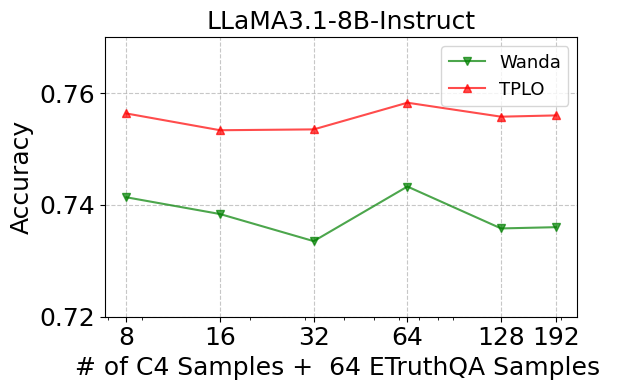

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Data points (approximate based on the figure)
calibration_samples = np.array([8, 16, 32, 64, 128, 192])



wanda_accuracy = np.array([
    [85.84, 78.16, 56.52, 76.03], [85.72, 78.52, 55.35, 75.76], 
    [85.56, 78.56, 54.95, 74.34], [86.41, 79.85, 56.26, 74.80], 
    [84.41, 78.85, 56.26, 74.80], [85.67, 78.03, 55.07, 75.64]
])

# Compute mean accuracy for each layer
wanda_accuracy = wanda_accuracy.mean(axis=1) / 100.0
tplo_auuracy = np.array([
    [85.84, 78.16, 55.52, 75.03], [85.72, 78.52, 54.35, 74.76], 
    [85.56, 78.56, 54.95, 74.34], [85.41, 78.85, 56.26, 74.80], 
    [84.41, 78.85, 56.26, 74.80], [85.67, 78.03, 55.07, 75.64]
])
tplo_auuracy = tplo_auuracy.mean(axis=1) / 100.0
tplo_auuracy = tplo_auuracy + 0.02

# Create the figure
plt.figure(figsize=(6, 4))

# Plot the two lines
plt.plot(calibration_samples, wanda_accuracy, marker='v', linestyle='-', color='green', alpha=0.7, label='Wanda')
plt.plot(calibration_samples, tplo_auuracy, marker='^', linestyle='-', color='red', alpha=0.7, label='TPLO')

# Labels, title, and grid
plt.xlabel("# of C4 Samples +  64 ETruthQA Samples ", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.title("LLaMA3.1-8B-Instruct", fontsize=18)
plt.xscale("log")  # Log scale to match the figure trend
plt.xticks(calibration_samples, labels=[str(x) for x in calibration_samples])
plt.grid(True, linestyle="--", alpha=0.7)
plt.tick_params(labelsize=18)
# Legend
plt.legend(loc="upper right", fontsize=13)
plt.ylim(0.72, 0.77)

# Show the plot
plt.tight_layout()
plt.show()

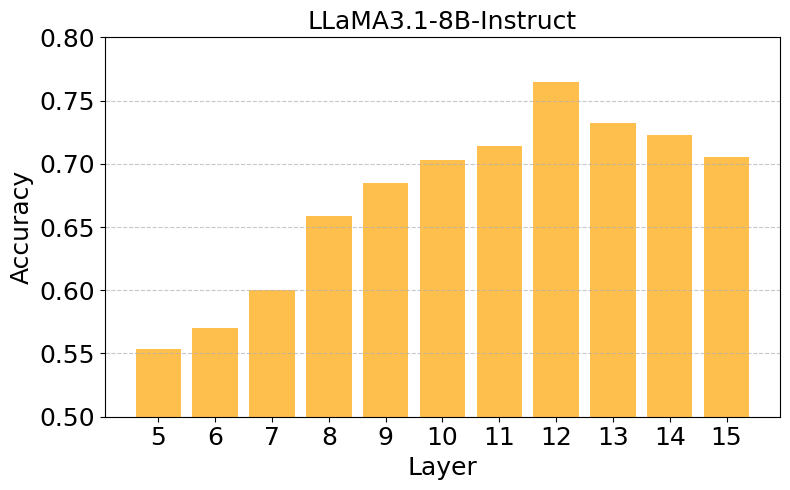

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Define layers and accuracy values
layers = np.array([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
accuracy_data = np.array([
    [58.18, 58.60, 50.46, 54.21], [61.08, 62.38, 50.55, 53.98], 
    [63.00, 68.05, 50.62, 58.39], [75.66, 72.34, 50.08, 65.55], 
    [79.87, 74.06, 50.63, 69.47], [79.62, 77.76, 50.57, 73.34], 
    [80.72, 77.77, 51.41, 75.84], 
    [87.73, 79.93, 59.51, 78.68], [82.24, 79.39, 56.45, 74.67], 
    [81.89, 77.12, 55.92, 74.03], [78.98, 78.03, 52.36, 72.90]
])

# Compute mean accuracy for each layer
mean_accuracy = accuracy_data.mean(axis=1) / 100.0


# Create figure and axis
plt.figure(figsize=(8, 5))

# Plot bars for each layer
plt.bar(layers, mean_accuracy, color='orange', alpha=0.7, label='Accuracy (bar)')

# Plot the curve connecting accuracy values
# plt.plot(layers, mean_accuracy, marker='o', linestyle='-', color='green', alpha=0.7, label='Accuracy (curve)')
plt.ylim(0.5, 0.8)

# Labels and title
plt.xticks(layers, fontsize=18)
plt.xlabel("Layer", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.title("LLaMA3.1-8B-Instruct", fontsize=18)

# Show grid
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tick_params(labelsize=18)
# Show legend
# plt.legend()

# Display the plot
plt.tight_layout()
plt.show()